# Import libraries

In [63]:
import sys
!{sys.executable} -m pip install numpy pandas opencv-python keras matplotlib tensorflow scikit-learn pydot pydotplus pydot_ng graphviz plot_model

3264.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [72]:
# !{sys.executable} -m pip freeze > requirements.txt

5395.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [51]:
import numpy as np
import pandas as pd
import glob
import time
import pydot
import pydot_ng
import pydotplus
import graphviz
# from xml.dom import minidom


import os
import matplotlib.pyplot as plt
import keras
import sklearn
import tensorflow

import cv2

# Loading data

In [3]:
df=pd.read_csv('XSSdata.csv')

In [4]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [5]:
df=df[df.columns[-2:]]  # Only get sentence and labels

In [6]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [7]:
# Get Sentences data from data frame
sentences=df['Sentence'].values
sentences[1]

'<tt onmouseover="alert(1)">test</tt>'

In [8]:
print(len(sentences))

13686


# Data Preprocessing

In [17]:
# # Convert to ASCII

# def convert_to_ascii(sentence):
#     sentence_ascii=[]

#     for i in sentence:
        
        
#         """Some characters have values very big e.d 8221 adn some are chinese letters
#         I am removing letters having values greater than 8222 and for rest greater 
#         than 128 and smaller than 8222 assigning them values so they can easily be normalized"""
       
#         if(ord(i)<8222):      # ” has ASCII of 8221
#                 sentence_ascii.append(134)
#         if(ord(i)==8221): # ”  :  8221
#                 sentence_ascii.append(129)
#         if(ord(i)==8220): # “  :  8220
#                 sentence_ascii.append(130)
#         if(ord(i)==8216): # ‘  :  8216
#                 sentence_ascii.append(131)
#         if(ord(i)==8217): # ’  :  8217
#             sentence_ascii.append(132)   
#         if(ord(i)==8211): # –  :  8211
#             sentence_ascii.append(133)                 
#             """
#             If values less than 128 store them else discard them
#             """
#         if (ord(i)<=128):
#             sentence_ascii.append(ord(i))
    
#         else:
#                     pass
#     zer=np.zeros((10000))
#     for i in range(len(sentence_ascii)):
#         zer[i]=sentence_ascii[i]
#     zer.shape=(100, 100)
#     return zer

This function converts each character in a sentence to its ASCII code, handles special characters, and creates a 100x100 matrix.

In [19]:
def convert_to_ascii(sentence):
    sentence_ascii = []
    
    for i in sentence:
        if ord(i) < 8222:
            if ord(i) <= 128:
                sentence_ascii.append(ord(i))
            elif ord(i) == 8221:
                sentence_ascii.append(129)
            elif ord(i) == 8220:
                sentence_ascii.append(130)
            elif ord(i) == 8216:
                sentence_ascii.append(131)
            elif ord(i) == 8217:
                sentence_ascii.append(132)
            elif ord(i) == 8211:
                sentence_ascii.append(133)
            else:
                sentence_ascii.append(134)
    
    # Pad or truncate the sentence_ascii to exactly 10000 elements
    sentence_ascii = sentence_ascii[:10000] + [0] * (10000 - len(sentence_ascii))
    
    zer = np.array(sentence_ascii, dtype=float).reshape(100, 100)
    return zer

# Data Conversion

Each sentence is converted to an ASCII matrix, resized to 100x100, and normalized by dividing by 128.

In [20]:
# send each sentence to be converted to ASCII


arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128

    
#     if i==1:
#         plt.plot(image)
#         plt.show()    
    arr[i]=image

In [21]:
print("Input data shape : ", arr.shape)

Input data shape :  (13686, 100, 100)


# Data Preparation

In [23]:
# Reshape data for input to CNN
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [24]:
data.shape

(13686, 100, 100, 1)

In [25]:
y=df['Label'].values

In [29]:
# Split into train/test data
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)
trainX, validX, trainY, validY = train_test_split(trainX,trainY, test_size=0.2, random_state=42)

# Building the CNN Model

In [30]:
# import libraries for Making Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

The CNN model is built with 3 Conv2D layers, 3 MaxPooling2D layers, and 4 Dense layers.

In [31]:
# A basic CNN Model
# Number of layers = 11
# Number of Convolutional layer: 3

model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

/mnt/Share/Engineer/bachelor/xssML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training the Model

The model is compiled with **binary_crossentropy** as the loss function and **adam** as the optimizer.

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,553,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,964,737 (26.57 MB)

 Trainable params: 6,964,737 (26.57 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
batch_size = 128
num_epoch = 10
#model training
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Change the filepath to end with .weights.h5
mc = ModelCheckpoint('best_model.weights.h5', save_best_only=True, save_weights_only=True)

model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(validX, validY),
          callbacks=[mc]
)

Epoch 1/10


2024-10-11 00:08:19.384370: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 350320000 exceeds 10% of free system memory.
2024-10-11 00:08:21.116507: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314703872 exceeds 10% of free system memory.
2024-10-11 00:08:21.325344: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144769024 exceeds 10% of free system memory.
2024-10-11 00:08:22.008428: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144769024 exceeds 10% of free system memory.
2024-10-11 00:08:22.497990: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 157351936 exceeds 10% of free system memory.


69/69 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.7295 - loss: 0.5332 - val_accuracy: 0.8210 - val_loss: 0.3816
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8361 - loss: 0.3593 - val_accuracy: 0.9352 - val_loss: 0.1394
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.9677 - loss: 0.0997 - val_accuracy: 0.9813 - val_loss: 0.0650
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9790 - loss: 0.0730 - val_accuracy: 0.9840 - val_loss: 0.0655
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9831 - loss: 0.0564 - val_accuracy: 0.9854 - val_loss: 0.0506
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9881 - loss: 0.0438 - val_accuracy: 0.9854 - val_loss: 0.0609
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9874 - loss: 0.0435 - val_accuracy: 0.9872 - val_loss: 0.0529
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9900 - val_loss: 0.

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


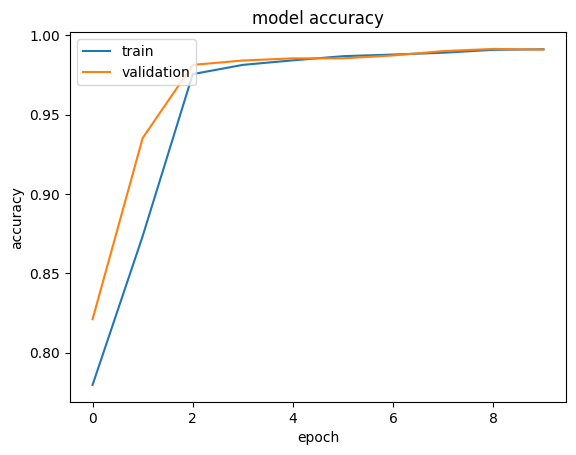

In [53]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
plot_hist(model_log)

# Model Evaluation

The model is evaluated by calculating metrics such as confusion matrix and classification report.

In [57]:
y_prob

array([[0.99975187],
       [0.9865218 ],
       [0.99919164],
       ...,
       [0.43965757],
       [0.98351306],
       [0.99962974]], dtype=float32)

In [56]:
from sklearn import metrics
model.load_weights('best_model.weights.h5')

y_prob = model.predict(testX)
threshold = 0.5
y_pred = (y_prob > threshold).astype(int)
# y_pred = np.argmax(y_prob, axis=1)

clf_report = metrics.classification_report(testY, y_pred, digits=4)
cnf_matrix = metrics.confusion_matrix(testY, y_pred)
TN, FP, FN, TP = cnf_matrix.ravel()
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
# fpr, tpr, _ = metrics.roc_curve(testY, y_prob[:, 1])
# auc = metrics.roc_auc_score(testY, y_prob[:, 1])
other_metrics = pd.DataFrame({'TPR': '%.4f' % TPR, 
                              'FPR': '%.4f' % FPR, 
                              'FNR': '%.4f' % FNR
                              }, index=[0]).to_string(col_space=9, index=False)
print(clf_report)
print(cnf_matrix)
print(other_metrics)

86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step
              precision    recall  f1-score   support

           0     0.9865    0.9841    0.9853      1260
           1     0.9865    0.9885    0.9875      1478

    accuracy                         0.9865      2738
   macro avg     0.9865    0.9863    0.9864      2738
weighted avg     0.9865    0.9865    0.9865      2738

[[1240   20]
 [  17 1461]]
      TPR       FPR       FNR
   0.9885    0.0159    0.0115


# XSS Checking

In [71]:
# Load the trained model weights
model.load_weights('best_model.weights.h5')

def check_xss(input_string):
    # Preprocess the input string
    processed_input = convert_to_ascii(input_string)
    processed_input = processed_input.reshape(1, 100, 100, 1)  # Reshape for model input
    
    # Make prediction
    prediction = model.predict(processed_input)
    
    # Interpret the result
    is_xss = prediction[0][0] > 0.5
    confidence = prediction[0][0] if is_xss else 1 - prediction[0][0]
    
    return is_xss, confidence

# Example usage
test_string = '<a onclick="alert(1)" style=display:block>test</a>'
is_xss, confidence = check_xss(test_string)
print(f"Is XSS: {is_xss}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Is XSS: True
Confidence: 1.00
